# Project notebook for applied_statistics

This notebook is designed to analyse the PlantGrowth dataset and perform statistical analysis on it using t-test and ANOVA methods.
The dataset was downloaded from https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/datasets/PlantGrowth.csv and contains results of an experiment to compare the weights of plants under three different conditions.


In [1]:
# Import any required modules

# Data Frames
import pandas as pd

# Numerical Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Statistical plotting
import seaborn as sns

# Statistics
import scipy.stats as stats

In [2]:
# Import the data into a dataframe 

df = pd.read_csv('data/plantgrowth.csv')

df.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


Describe the data

In [3]:
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [4]:
df.shape

(30, 3)

In [5]:
df.info

<bound method DataFrame.info of     rownames  weight group
0          1    4.17  ctrl
1          2    5.58  ctrl
2          3    5.18  ctrl
3          4    6.11  ctrl
4          5    4.50  ctrl
5          6    4.61  ctrl
6          7    5.17  ctrl
7          8    4.53  ctrl
8          9    5.33  ctrl
9         10    5.14  ctrl
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19        20    4.69  trt1
20        21    6.31  trt2
21        22    5.12  trt2
22        23    5.54  trt2
23        24    5.50  trt2
24        25    5.37  trt2
25        26    5.29  trt2
26        27    4.92  trt2
27        28    6.15  trt2
28        29    5.80  trt2
29        30    5.26  trt2>

In [6]:
unique_class = df.group.unique()
unique_class

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [7]:
group_ctrl=df.loc[df["group"]=="ctrl"]
group_trt1=df.loc[df["group"]=="trt1"]
group_trt2=df.loc[df["group"]=="trt2"]

print (f"ctrl: {len(group_ctrl)}\t trt1: {len(group_trt1)} \t trt2: {len(group_trt2)}")

ctrl: 10	 trt1: 10 	 trt2: 10


In [8]:
# Cycle through the three groups and print summary stats for each one

grp=0
while grp < 3:
     data = df.loc[df["group"]==unique_class[grp]]
     data = data.describe().weight[['min', 'max', 'mean', 'std']]
     print(f"Group: \t{unique_class[grp]}, \n{data}\n")
     grp=grp+1

Group: 	ctrl, 
min     4.170000
max     6.110000
mean    5.032000
std     0.583091
Name: weight, dtype: float64

Group: 	trt1, 
min     3.590000
max     6.030000
mean    4.661000
std     0.793676
Name: weight, dtype: float64

Group: 	trt2, 
min     4.920000
max     6.310000
mean    5.526000
std     0.442573
Name: weight, dtype: float64



## $t$ Test ##

A $t$ Test is...   

It was developed by...   

There are three different flavours of the t Test:      
- One Sample t Test   
- Independent Sample t Test   
- Dependent/Paired Sample t Test   

Dependent/Paired Sample t Test - works by comparing the means between two related groups on the same continuous dependent variable.   
Independent Sample t Test - works by comparing the means of two unrelated groups on the same continuous dependent variable. 

Given that our data is....we will use the Dependent/Paired Sample t Test.

### Assumptions are
...from laerd.com 
(https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php) 
https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php
- The dependent variable should be measured on a continuous scale.
- The independnt variable should consist of two categorical, independent groups. 
- There should be no relationship between the observations in each group.   
- There should be no significant outliers.   
- The dependent variable should be approximately normally distributed for each group of observations.   
- There needs to be homogeneity of variances - Levene’s test!

We will test these assumptions below:

Assumption1 - check! The dependent variable is weight which is a continuous variable.

Assumption2 - check! We have two categorical, independent groups - trt1 and trt2.

Assumption3 - check! Both trt1 andtrt2 are independent groups with no relationship between the observations in each group.

Assumptions4, 5, 6 will be checked using various plots below...

Test for Normality using histograms...maybe we don't have enough data though.....

In [21]:
group_trt1["weight"]

10    4.81
11    4.17
12    4.41
13    3.59
14    5.87
15    3.83
16    6.03
17    4.89
18    4.32
19    4.69
Name: weight, dtype: float64

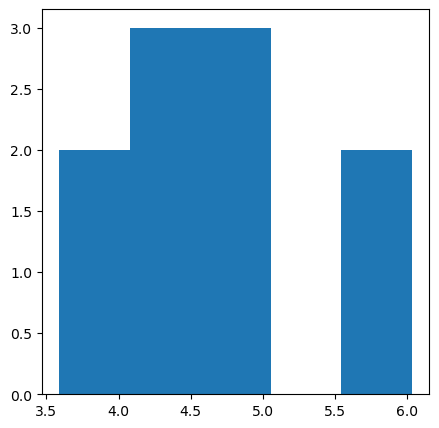

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(group_trt1["weight"], bins=5);

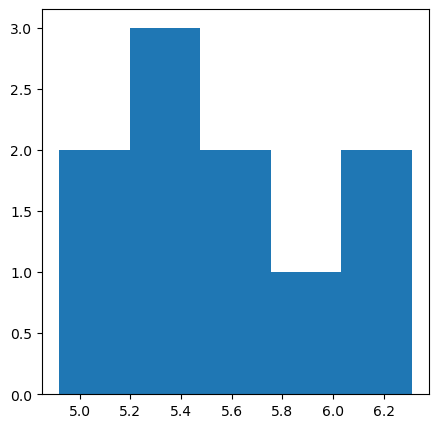

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(group_trt2["weight"], bins=5);

In [24]:
# Shapiro Wilks test for normality - trt1
res = stats.shapiro(group_trt1["weight"])
res

ShapiroResult(statistic=0.9304108619689941, pvalue=0.451945960521698)

In [25]:
# Shapiro Wilks test for normality - trt2
res = stats.shapiro(group_trt2["weight"])
res

ShapiroResult(statistic=0.941005289554596, pvalue=0.5642533898353577)

Since both p values are greater than 0.05 so we have no reason to reject the null hypothesis that the data are not normally distributed

In [ ]:
# Convert the data to dataframe for plotting

data = pd.concat([
    pd.DataFrame({"weight": group_trt1["weight"], "group": "trt1"}),
    pd.DataFrame({"weight": group_trt2["weight"], "group": "trt2"})

A strip plot will show us the concentration of the data

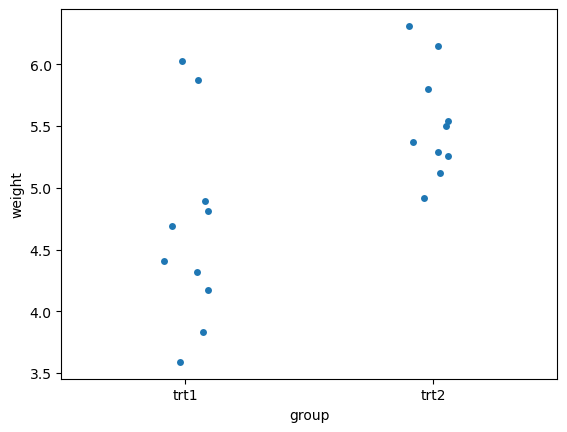

In [ ]:
# stripplot 
# https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn-stripplot
sns.stripplot(data=data, x="group", y="weight");

A box plot will show the existance any significant outliers

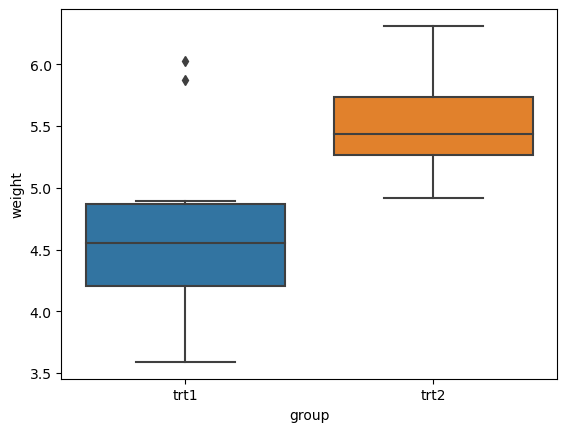

In [20]:
sns.boxplot(data=data, x="group", y="weight");

Perform t-test

In [13]:
stats.ttest_ind(group_trt1["weight"], group_trt2["weight"])

Ttest_indResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574)

In [14]:
group_trt1['weight']


10    4.81
11    4.17
12    4.41
13    3.59
14    5.87
15    3.83
16    6.03
17    4.89
18    4.32
19    4.69
Name: weight, dtype: float64

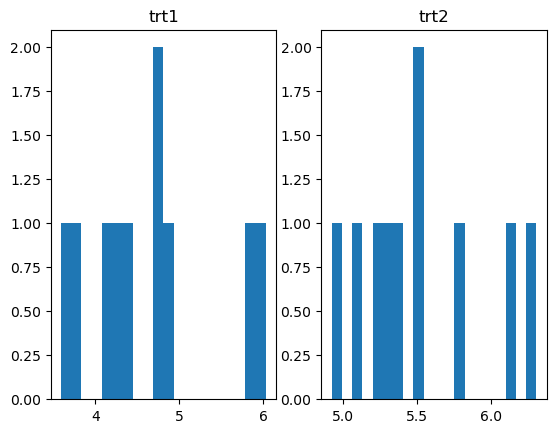

In [15]:
# Histograms

fig, ax = plt.subplots(1,2)
ax[0].hist(group_trt1['weight'],bins=20)
ax[0].set_title("trt1")
ax[1].hist(group_trt2['weight'],bins=20)
ax[1].set_title("trt2");


ANOVA test - description

Perform ANOVA test

Explain why ANOVA is more appropriate when analysinng more than two groups

## End